#### IQR method

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

In [30]:
# Load Breast Cancer dataset from scikit-learn
breast_cancer = load_breast_cancer()
data          = breast_cancer.data
feature_names = breast_cancer.feature_names

In [31]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
# Select two columns for IQR analysis
selected_columns = ['mean radius', 'mean area']

In [33]:
# Create a DataFrame for selected columns
df_selected = pd.DataFrame(data, columns=feature_names)[selected_columns]


In [34]:
df_selected

,mean radius,mean area
0,17.99,1001.0
1,20.57,1326.0
2,19.69,1203.0
3,11.42,386.1
4,20.29,1297.0
...,...,...
564,21.56,1479.0
565,20.13,1261.0
566,16.60,858.1
567,20.60,1265.0


In [35]:
# Calculate quartiles and IQR
Q1 = df_selected.quantile(0.25)
Q2 = df_selected.median()
Q3 = df_selected.quantile(0.75)
Q4 = df_selected.quantile(1)

In [36]:
IQR = Q3 - Q1

In [37]:
# Calculate upper and lower cutoff values
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

In [38]:
# Display the results
print("Quartiles (Q1, Q2, Q3, Q4):")
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print("\nInterquartile Range (IQR):")
print(IQR)
print("\nLower Cutoff:")
print(lower_cutoff)
print("\nUpper Cutoff:")
print(upper_cutoff)

Quartiles (Q1, Q2, Q3, Q4):
mean radius     11.7
mean area      420.3
Name: 0.25, dtype: float64
mean radius     13.37
mean area      551.10
dtype: float64
mean radius     15.78
mean area      782.70
Name: 0.75, dtype: float64
mean radius      28.11
mean area      2501.00
Name: 1.0, dtype: float64

Interquartile Range (IQR):
mean radius      4.08
mean area      362.40
dtype: float64

Lower Cutoff:
mean radius      5.58
mean area     -123.30
dtype: float64

Upper Cutoff:
mean radius      21.9
mean area      1326.3
dtype: float64


In [39]:
from scipy.stats import norm

In [40]:
np.random.seed(42)
data = np.random.normal(100, 15, 1000)

In [41]:
# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

In [42]:
# Calculate Z scores for each data point
z_scores = (data - mean) / std_dev

In [43]:
z_scores

array([ 4.87758572e-01, -1.61021904e-01,  6.42014567e-01,  1.53638248e+00,
       -2.58995242e-01, -2.58978467e-01,  1.59378665e+00,  7.64363585e-01,
       -4.99431238e-01,  5.34600978e-01, -4.93242896e-01, -4.95605212e-01,
        2.27469351e-01, -1.97461996e+00, -1.78216326e+00, -5.94261787e-01,
       -1.05459849e+00,  3.01325615e-01, -9.47513333e-01, -1.46275408e+00,
        1.47775415e+00, -2.50436081e-01,  4.92437502e-02, -1.47546906e+00,
       -5.75967800e-01,  9.35813644e-02, -1.19576407e+00,  3.64112006e-01,
       -6.33446556e-01, -3.17786326e-01, -6.34537691e-01,  1.87278742e+00,
       -3.35428645e-02, -1.10045381e+00,  8.20671655e-01, -1.26713242e+00,
        1.93651235e-01, -2.02201817e+00, -1.37680803e+00,  1.81387990e-01,
        7.34765779e-01,  1.55340916e-01, -1.37914298e-01, -3.27400808e-01,
       -1.53041171e+00, -7.55243150e-01, -4.90403570e-01,  1.06034779e+00,
        3.31334985e-01, -1.82111422e+00,  3.11376063e-01, -4.13204769e-01,
       -7.11387976e-01,  

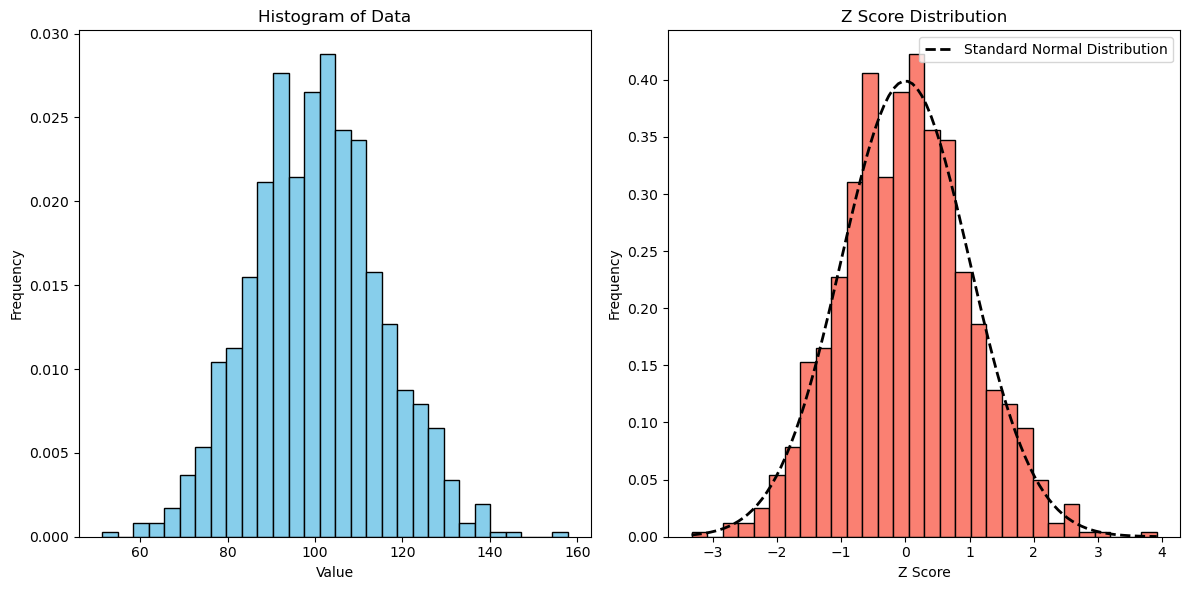

In [44]:
# Plot the histogram of the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the Z score distribution using a standard normal distribution (mean=0, std_dev=1)
plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=30, density=True, color='salmon', edgecolor='black')
plt.title('Z Score Distribution')
plt.xlabel('Z Score')
plt.ylabel('Frequency')

# Overlay the standard normal distribution curve on the Z score plot
x = np.linspace(min(z_scores), max(z_scores), 100)
plt.plot(x, norm.pdf(x, 0, 1), color='black', linestyle='dashed', linewidth=2, label='Standard Normal Distribution')
plt.legend()

plt.tight_layout()

#### Best practices

1. **Understand the Context**:
   - **Domain Knowledge**: Leverage domain expertise to define what constitutes an outlier in the specific context of your data.
   - **Impact on Analysis**: Assess how outliers might influence your model or analysis—whether they represent true anomalies or errors.

2. **Visualize Data**:
   - **Boxplots**: Use boxplots to visually identify outliers as points beyond the whiskers.
     ```python
     import seaborn as sns
     sns.boxplot(x=df['column_name'])
     ```
   - **Scatter Plots**: Visualize data distributions and relationships between variables to spot outliers.
     ```python
     sns.scatterplot(x='feature1', y='feature2', data=df)
     ```
   - **Histograms**: Use histograms to understand the distribution and spot any unusual peaks or gaps.
     ```python
     df['column_name'].hist()
     ```

3. **Statistical Methods**:
   - **Z-Score Method**: Identify outliers as data points that fall beyond a threshold (e.g., ±3 standard deviations from the mean).
     ```python
     from scipy import stats
     df['z_score'] = stats.zscore(df['column_name'])
     outliers = df[df['z_score'].abs() > 3]
     ```
   - **IQR Method**: Detect outliers as points that lie outside 1.5 times the interquartile range (IQR).
     ```python
     Q1 = df['column_name'].quantile(0.25)
     Q3 = df['column_name'].quantile(0.75)
     IQR = Q3 - Q1
     outliers = df[(df['column_name'] < (Q1 - 1.5 * IQR)) | (df['column_name'] > (Q3 + 1.5 * IQR))]
     ```

4. **Model-Based Approaches**:
   - **Isolation Forest**: Use machine learning models like Isolation Forest to detect outliers.
     ```python
     from sklearn.ensemble import IsolationForest
     iso = IsolationForest(contamination=0.05)
     df['outliers'] = iso.fit_predict(df[['column_name']])
     ```
   - **DBSCAN**: Apply density-based clustering like DBSCAN to find outliers as points that do not belong to any cluster.
     ```python
     from sklearn.cluster import DBSCAN
     dbscan = DBSCAN(eps=0.5, min_samples=5)
     df['clusters'] = dbscan.fit_predict(df[['feature1', 'feature2']])
     outliers = df[df['clusters'] == -1]
     ```

5. **Robust Statistics**:
   - **Use Robust Measures**: Instead of mean and standard deviation, use median and IQR, which are less sensitive to outliers.
     ```python
     median = df['column_name'].median()
     mad = df['column_name'].mad()  # Median absolute deviation
     ```

6. **Treat Outliers Based on Their Nature**:
   - **Cap/Clamp Extreme Values**: Cap values that are beyond a certain threshold to reduce their impact.
     ```python
     df['column_name'] = df['column_name'].clip(lower, upper)
     ```
   - **Remove Outliers**: If outliers are due to errors or noise, consider removing them.
     ```python
     df = df[(df['column_name'] >= lower) & (df['column_name'] <= upper)]
     ```
   - **Transform Data**: Apply transformations like log, square root, or Box-Cox to reduce the impact of outliers.
     ```python
     df['log_column'] = np.log(df['column_name'] + 1)
     ```

7. **Evaluate Impact on Models**:
   - **Compare Model Performance**: Assess how outliers affect model performance before and after treatment.
     ```python
     # Compare accuracy, RMSE, or other metrics with and without outliers
     ```

8. **Iterate and Validate**:
   - **Continuous Monitoring**: Outlier detection is an iterative process. Continuously monitor for new outliers as data evolves.
   - **Validate Findings**: Cross-check outlier detection results with domain experts to validate their significance.

9. **Document Decisions**:
   - **Record Methods Used**: Keep detailed records of how outliers were detected and treated, including thresholds and assumptions.
     ```python
     # Log outlier detection and treatment steps
     ```

10. **Be Cautious with Automated Removal**:
    - **Understand Risks**: Automated outlier removal can sometimes remove critical data points. Always consider the potential impact on your analysis or model.
     ```python
     # Consider the implications of removing outliers automatically
     ```